### Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
 # Import the fcluster and linkage functions
from scipy.cluster.hierarchy import linkage, fcluster

### Create dataset

In [2]:
# Define the data
data = {
    "x_coordinate": [17, 20, 35, 14, 37, 33, 14, 30, 35, 17, 11, 21, 13, 10, 81, 84, 87, 83, 90, 97, 94, 88, 89, 93, 92, 82, 81, 92, 91, 22, 23, 25, 25, 27, 17, 17],
    "y_coordinate": [4, 6, 0, 0, 4, 3, 1, 6, 5, 4, 6, 10, 8, 10, 97, 94, 99, 95, 95, 97, 99, 99, 94, 99, 90, 98, 100, 93, 98, 15, 10, 0, 10, 7, 17, 15],
    "x_scaled": [0.509, 0.599, 1.049, 0.419, 1.109, 0.989, 0.419, 0.899, 1.049, 0.509, 0.330, 0.629, 0.390, 0.300, 2.427, 2.517, 2.607, 2.487, 2.697, 2.906, 2.816, 2.637, 2.667, 2.786, 2.756, 2.457, 2.427, 2.756, 2.727, 0.659, 0.689, 0.749, 0.749, 0.809, 0.509, 0.509],
    "y_scaled": [0.090, 0.135, 0.000, 0.000, 0.090, 0.068, 0.023, 0.135, 0.113, 0.090, 0.135, 0.225, 0.180, 0.225, 2.183, 2.115, 2.228, 2.138, 2.138, 2.183, 2.228, 2.228, 2.115, 2.228, 2.025, 2.205, 2.250, 2.093, 2.205, 0.338, 0.225, 0.000, 0.225, 0.158, 0.383, 0.338]
}

# Create DataFrame
comic_con = pd.DataFrame(data)

### Creating a distance matrix using linkage

A critical step is to compute the distance matrix at each stage. This is achieved through the linkage method available in scipy-dot-cluster-dot-hierarchy. This process computes the distances between clusters as we go from N clusters to 1 cluster, where N is the number of points. There are four parameters for this method. The first parameter is the observations. The second parameter, method, tells the algorithm how to calculate proximity between two clusters. The metric is the function that decides the distance between two objects. Euclidean distance is a straight line distance between two points on a 2D plane. You can use your own function here. The optimal_ordering is an optional argument that changes the order of linkage matrix. We will not use this argument. Let us explore the method argument.

scipy.cluster.hierarchy.linkage(observations,  
method = 'ward', -> hot to calculate proximity of clusters  
metric = 'euclidean', -> distance metric  
optimal_ordering = False -> order data points  
)

'single': based on two closest objects  
'complete':  based on two farthest objects  
'average': based on the arithmetic mean of all objects  
'centroid': based on the geometric mean of all objects  
'median': based on the median of all objects  
'ward': based on the sum of squares  (The ward method focuses on clusters more concentric towards its center.)

###  Creating a cluster labels with fcluster

Once you have created the distance matrix, you can create the cluster labels through the fcluster method, which takes three arguments -the distance matrix, the number of clusters and the criteria to form the clusters based on certain thresholds. We will use the value of maxclust in the criterion argument.

scipy.cluster.hierarchy.fcluster(  
distance_matrix,  -> output of linkage() method
num_clusters,  
criterion  -> how to descide thresholds to form clusters
)


### Hierarchical clustering: ward method

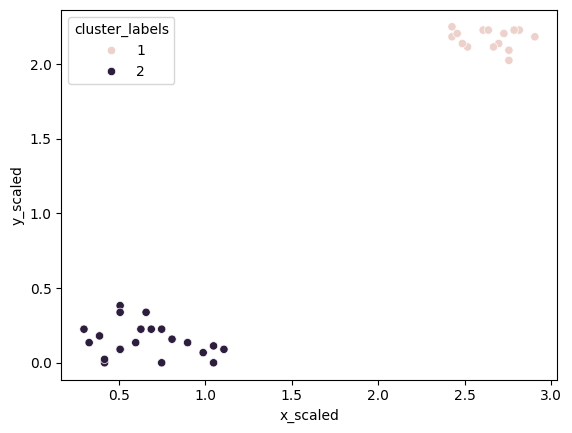

In [3]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'ward', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: single method

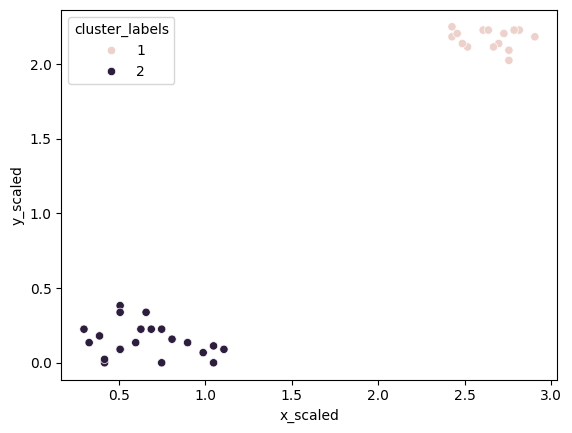

In [4]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'single', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Hierarchical clustering: complete method

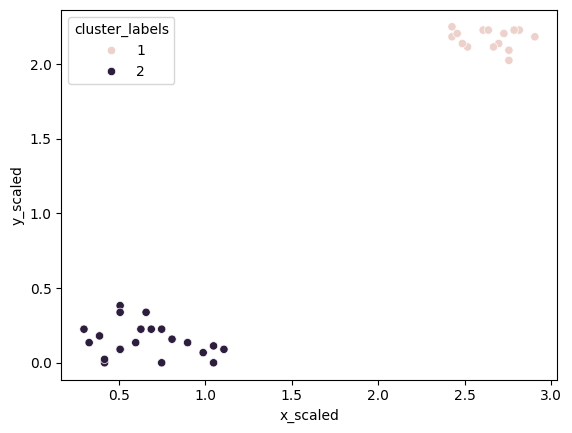

In [5]:
# Use the linkage() function
distance_matrix = linkage(comic_con[['x_scaled', 'y_scaled']], method = 'complete', metric = 'euclidean')

# Assign cluster labels
comic_con['cluster_labels'] = fcluster(distance_matrix, 2, criterion='maxclust')

# Plot clusters
sns.scatterplot(x='x_scaled', y='y_scaled', 
                hue='cluster_labels', data = comic_con)
plt.show()

### Visualize clusters with matplotlib
We can manually define colors to the classes

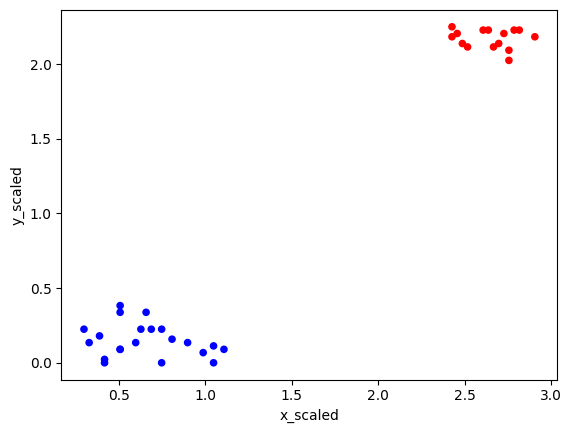

In [6]:
# Define a colors dictionary for clusters
colors = {1:'red', 2:'blue'}
# Plot a scatter plot
comic_con.plot.scatter(x='x_scaled', 
                       y='y_scaled',
                       c=comic_con['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

###  Visualize clusters with seaborn
provides predetermined plotting themes and functions for quick visualizations

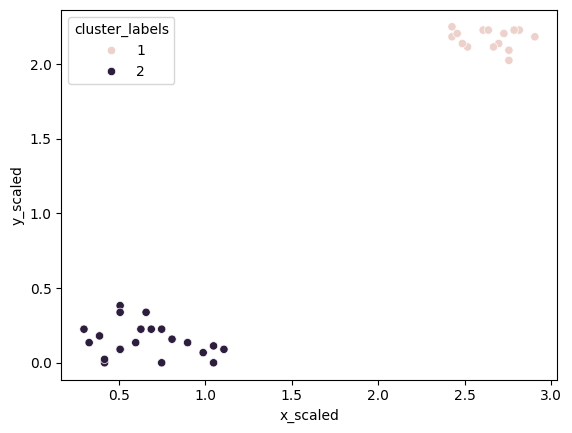

In [7]:
# Plot a scatter plot using seaborn
sns.scatterplot(x='x_scaled', 
                y='y_scaled', 
                hue='cluster_labels', 
                data = comic_con)
plt.show()

### Dendrograms
Branching diagram that shows the progression in a linkage object as we proceed through the hierarchical clustering algorithm.  

Recall the hierarchical clustering algorithm, where each step was a result of merging of two closest clusters in the earlier step. The x axis represents individual points, whereas the y axis represents the distance or dissimilarity between clusters. In the dendrogram, each inverted U represents a cluster divided into its two child clusters. The inverted U at the top of the figure represents a single cluster of all the data points. The width of the U shape represents the distance between the two child clusters. A wider U, therefore, means that the two child clusters were farther away from each other as compared to a narrower U in the diagram.  

Drawing a horizontal line at any part of the figure, the number of vertical lines it intersects tells you the number of clusters at that stage, and the distance between those vertical lines indicates the inter-cluster distance. At the horizontal line drawn on the figure at hight 1, we can see that there are two clusters. When you move the line below, the number of clusters increases but the inter-cluster distance decreases. This information helps us in deciding the number of clusters.


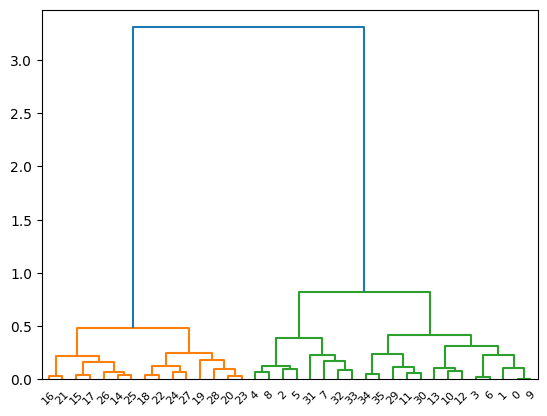

In [8]:
# Import the dendrogram function
from scipy.cluster.hierarchy import dendrogram
# Create a dendrogram
dn = dendrogram(distance_matrix)
# Display the dendogram
plt.show()

### Timing
- Quadractic increased runtime with more data points
- Hierarchical clustering is not feasible for large datasets

In [12]:
import random, timeit

points = 100
df = pd.DataFrame({
    'x': random.sample(range(0, points),points),
    'y': random.sample(range(0, points),points)
})

%timeit linkage(df[['x','y']], method='ward', metric='euclidean')


150 μs ± 2.33 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


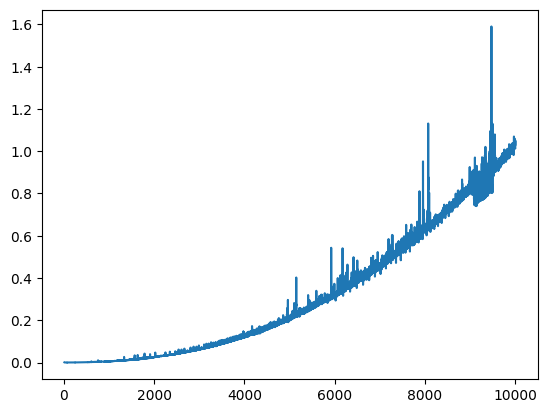

In [40]:
df = pd.DataFrame()

def generateDataset(points):
    return pd.DataFrame({
        'x': random.sample(range(0, points),points),
        'y': random.sample(range(0, points),points)
    })

def myLinkage():
    linkage(df[['x','y']], method='ward', metric='euclidean')

time = []
num_points = []

for i in range(10, 10001):  # range goes from 10 to 10000 (inclusive)
    df = generateDataset(i)
    timer = timeit.Timer(myLinkage)
    # Run the timer 1 time and capture the execution time
    execution_time = timer.timeit(number=1)
    time.append(execution_time)
    num_points.append(i)


plt.plot(num_points, time)

